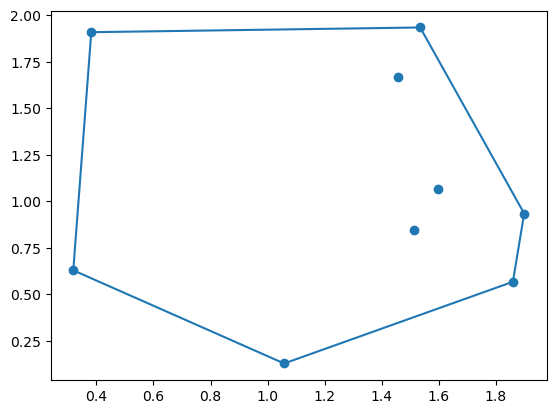

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data = np.loadtxt('mesh.dat', skiprows=1)
data = data[(data[:, 0] < 2) & (data[:, 1] < 2)]
X = data[:, 0]
Y = data[:, 1]

#2D Graham scan 

def isCCW(v_a, v_b):
    crossprod = v_a[0]*v_b[1] - v_a[1]*v_b[0]
    return(crossprod>0)

def Grahamscan(data):
    Y = data[:, 1]
    ii = np.argmin(Y)        #find lowest y coordinate
    ipt = data[ii]
    length = len(data)
    angarr = np.zeros(length)
    for j in range(length):       #i'll take the dot product to represent an angle. a is the unit vector in x direction, b is displacement ot new pt
        a = [1,0]
        b = data[j]-ipt
        normb = np.sqrt(b[0]**2 + b[1]**2)
        if(j==ii):
            angarr[j] = -999
        else:
            angarr[j] = np.dot(a,b) / normb
    sort_indices = np.argsort(angarr)
    data_sorted = data[sort_indices]
    
    hull = []                           #data_sorted[0:3, :]   didn't do this since you can only append to lists
    for k in range(3):
        hull.append(data_sorted[k])    #adds first three points
        
    for i in range(3, length):
        cont=True
        while(cont):
            v_next = data_sorted[i]-hull[-1]
            v_prev = hull[-1]-hull[-2]
            if(isCCW(v_prev,v_next)):
                hull.pop()
                cont = True
            else:
                cont = False
                hull.append(data_sorted[i])
                
    
    hull.append(data_sorted[0]) #handles last step
    return hull
    

hull = np.array(Grahamscan(data))  #plots
X_f = hull[:, 0]
Y_f = hull[:, 1]
plt.plot(X_f, Y_f)
plt.scatter(X,Y) 

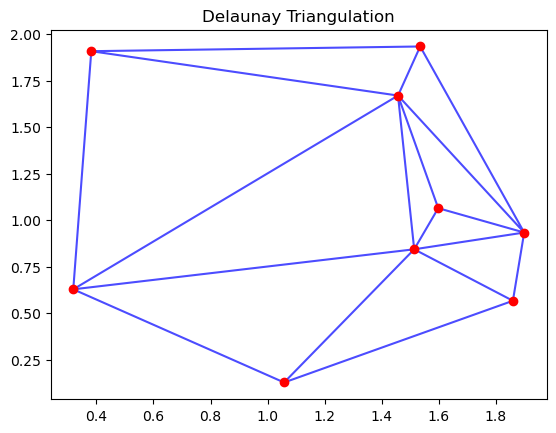

In [6]:
# Compute Delaunay triangulation

from scipy.spatial import Delaunay

points = np.column_stack((X, Y))
    

tri = Delaunay(points)

# Plot the points and the triangulation
plt.triplot(X, Y, tri.simplices, color='blue', alpha=0.7)
plt.scatter(X, Y, color='red', label='Points')
plt.title('Delaunay Triangulation')
plt.show()

In [18]:
#now lift the surface, and for each triangle calculate the change in area

def triangle_area(p1, p2, p3): #input is numpy arrays p = [x, y, z]
    
    # Calculate the vectors for two sides of the triangle, and their cross product
    v1 = p2 - p1
    v2 = p3 - p1
    cross_product = np.cross(v1, v2)
    
    area = 0.5 * np.linalg.norm(cross_product)    #area is half the parallelogram they form
    return area

def plot_filled_triangle(p1, p2, p3, color):
    
    # Plot and fill the triangle
    plt.fill(x_coords, y_coords, color=color, edgecolor='black', alpha=0.7)
    
    # Set labels and grid
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Triangle on 2D Heat Map')
    plt.grid(True)
    plt.show()

def lift_f(x, y):
    return x**2 + y**2





[[4 6 2]
 [6 0 2]
 [1 6 4]
 [6 1 7]
 [3 8 5]
 [5 8 7]
 [0 8 2]
 [8 3 2]
 [8 6 7]
 [6 8 0]]


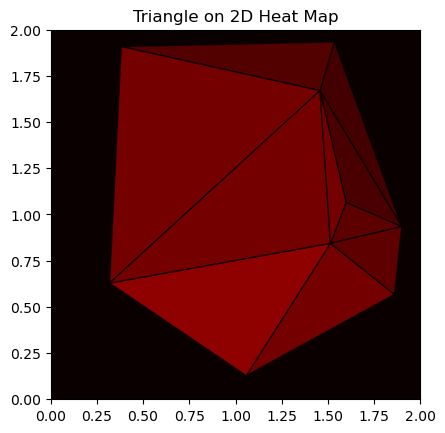

In [48]:
tricoords = tri.simplices
#print(tricoords)

# Plot heat map background
plt.imshow(np.zeros((2, 2)), cmap='hot', origin='lower', extent=(0, 2, 0, 2))

for t in tricoords:
    p1 = points[t[0]]
    p2 = points[t[1]]
    p3 = points[t[2]]
    #print("Points: ", p1, p2, p3)
    og_area = triangle_area(p1,p2,p3)
    #print("Area: ", og_area)

    z1 = lift_f(p1[0], p1[1])       
    lifted_p1 = np.append(p1, z1)
    z2 = lift_f(p2[0], p2[1])      
    lifted_p2 = np.append(p2, z2)
    z3 = lift_f(p3[0], p3[1])       
    lifted_p3 = np.append(p3, z3)

    #print("Lifted Points: ", lifted_p1, lifted_p2, lifted_p3)
    new_area = triangle_area(lifted_p1, lifted_p2, lifted_p3)
    #print("Lifted Area: ", new_area)

    redness = (og_area/new_area)

    x_coords = [p1[0], p2[0], p3[0]]  # Extract x and y coordinates of the points
    y_coords = [p1[1], p2[1], p3[1]]
    plt.fill(x_coords, y_coords, color=(2*redness, 0, 0), edgecolor='black', alpha=0.7)    # Plot and fill the triangle, using an RGB tuple
    plt.title('Area change for lifted triangles')
    
#plt.grid(True)
plt.show()

#makes sense that triangles are stretched depending on how far they are from origin

c) 

The induced metric can be calculated by taking derivatives (d/dx and d/dy) of $\vec{r} = (x, y, x^2 + y^2)$, and performing dot products.

$g_{xx} = 1+4x^2$

$g_{xy} = g_{yx} = 4xy$

$g_{yy} = 1+4y^2$


[[4 6 2]
 [6 0 2]
 [1 6 4]
 [6 1 7]
 [3 8 5]
 [5 8 7]
 [0 8 2]
 [8 3 2]
 [8 6 7]
 [6 8 0]]


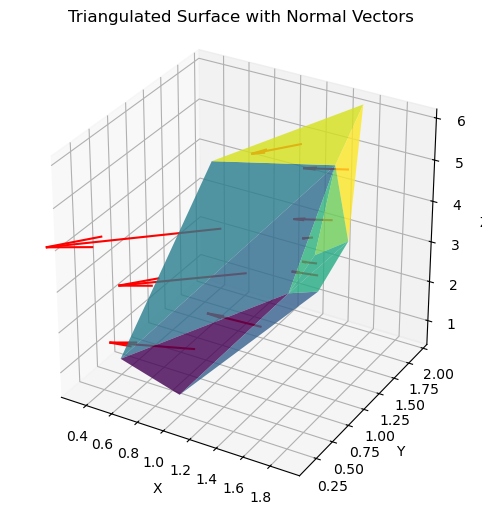

In [143]:
#now plot the lifted surface in 3D, along with a surface normal

zvals = []
for pt in points:
    zvals.append(lift_f(pt[0], pt[1]))

lifted_points = np.column_stack((X, Y, np.array(zvals)))


tri_3D = Delaunay(lifted_points[:, :2])  # Use only the x, y coordinates for triangulation
print(tri_3D.simplices)


# Plot the triangulated surface in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
# Use plot_trisurf to create the surface
ax.plot_trisurf(lifted_points[:, 0], lifted_points[:, 1], lifted_points[:, 2], triangles=tri_3D.simplices, cmap='viridis', alpha=0.8)


def triangle_normal(p1, p2, p3): #input is numpy arrays p = [x, y, z]
    
    # Calculate the vectors for two sides of the triangle, and their cross product
    v1 = p2 - p1
    v2 = p3 - p1
    cross_product = np.cross(v1, v2)
    return cross_product

for t in tri_3D.simplices:
    p1 = lifted_points[t[0]]
    p2 = lifted_points[t[1]]
    p3 = lifted_points[t[2]]
    #print("Pt: ", p1, p2, p3)
    normal = triangle_normal(p1, p2, p3) / 3.0     #3 is an arbitrary scale factor for aesthetics
    if(normal[2]<0):
        normal = normal*-1    #flip if facing downwards
    center = (p1 + p2 + p3) / 3     # Calculate the center of the triangle
    
    # Plot the normal vector
    ax.quiver(
        center[0], center[1], center[2],  # Origin of the vector
        normal[0], normal[1], normal[2],  # Direction of the vector
        color='red'
    )



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangulated Surface with Normal Vectors')
plt.show()

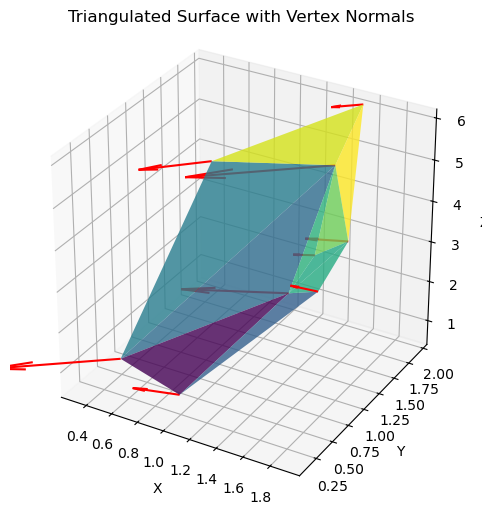

In [159]:
# Plot the triangulated surface in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
# Use plot_trisurf to create the surface
ax.plot_trisurf(lifted_points[:, 0], lifted_points[:, 1], lifted_points[:, 2], triangles=tri_3D.simplices, cmap='viridis', alpha=0.8)

vertex_norms = np.zeros(lifted_points.shape)  #creating a copy to store the averaged values

for t in tri_3D.simplices:
    p1 = lifted_points[t[0]]
    p2 = lifted_points[t[1]]
    p3 = lifted_points[t[2]]
    #print("Pt: ", p1, p2, p3)
    normal = triangle_normal(p1, p2, p3) / 9.0     #3 is an arbitrary scale factor for aesthetics
    if(normal[2]<0):
        normal = normal*-1    #flip if facing downwards

    vertex_norms[t[0]] += normal
    vertex_norms[t[1]] += normal
    vertex_norms[t[2]] += normal

    
for i in range(len(vertex_norms)):
    v = vertex_norms[i]
    pt = lifted_points[i]
    # Plot the normal vector
    ax.quiver(
        pt[0], pt[1], pt[2],  # Origin of the vector
        v[0], v[1], v[2],  # Direction of the vector
        color='red'
    )



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangulated Surface with Vertex Normals')
plt.show()

In [153]:
arr = np.array([1,2,3])
print(arr[0])

arrcopy = np.zeros(arr.shape)

arr[0] = 40

print(arrcopy[0])


1
0.0
